In [11]:
# Install missing packages
!pip install lifelines
!pip install geopandas
!pip install libpysal

# If you're running this in Google Colab or similar environment, you might need to restart the runtime after installation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from lifelines import KaplanMeierFitter, CoxPHFitter
import geopandas as gpd
from scipy.spatial.distance import pdist, squareform
from libpysal.weights import W

In [12]:
# import pandas as pd
# file_path = "Gov_Responses2Covid19_last.xlsx"
# df = pd.read_excel(file_path, sheet_name="Dataset")
# df.head()


In [13]:
# # Forward-fill and backward-fill for categorical policy measures within each country
# policy_cols = ['school', 'school_local', 'masks', 'masks_partial', 'domestic', 'domestic_local',
#                'travel', 'travel_partial', 'travel_dom', 'travel_dom_partial', 'curf', 'curf_partial',
#                'mass', 'mass_partial', 'elect', 'elect_partial', 'sport', 'sport_partial', 'rest',
#                'rest_local', 'testing', 'testing_narrow', 'surveillance', 'surveillance_partial',
#                'state', 'state_partial']

# df[policy_cols] = df.groupby(['geoid', 'country'], group_keys=False)[policy_cols].apply(lambda group: group.ffill().bfill())

# # Fill remaining missing policy values with 0 (assuming no policy intervention)
# df[policy_cols] = df[policy_cols].fillna(0)

# # Linear interpolation for economic measures within each country
# economic_cols = ['wage', 'taxc', 'credit', 'cash', 'export', 'rate', 'Economic_Measures']
# df[economic_cols] = df.groupby(['geoid', 'country'], group_keys=False)[economic_cols].apply(lambda group: group.interpolate(method='linear'))

# # Fill remaining missing economic values with 0 (assuming no intervention)
# df[economic_cols] = df[economic_cols].fillna(0)

# # Rolling average for cases and deaths (7-day window)
# df[['cases', 'deaths']] = df.groupby(['geoid', 'country'], group_keys=False)[['cases', 'deaths']].apply(
#     lambda group: group.fillna(group.rolling(7, min_periods=1).mean())
# )

# # Fill remaining missing cases & deaths with 0
# df[['cases', 'deaths']] = df[['cases', 'deaths']].fillna(0)

# # Drop election-related variables (optional)
# df.drop(columns=['elect', 'elect_partial'], errors='ignore', inplace=True)

# # Mean imputation for population within the same continent
# df['population_2019'] = df.groupby('continent')['population_2019'].transform(lambda x: x.fillna(x.mean()))

# # Fill missing continent values using most frequent value (mode)
# df['continent'].fillna(df['continent'].mode()[0], inplace=True)

# # Fill missing geoid with country ISO code (if applicable)
# df['geoid'].fillna(df['iso'], inplace=True)

# df['taxd'].fillna(0, inplace=True)
# df['Rigidity_Public_Health'].fillna(0, inplace=True)

# # Fill remaining missing population with global mean
# df['population_2019'].fillna(df['population_2019'].mean(), inplace=True)

# # Ensure index alignment
# df.reset_index(drop=True, inplace=True)

# # Check missing values again
# missing_values = df.isnull().sum()
# print(missing_values[missing_values > 0])

Step 1: Loading and preparing data...


<ipython-input-14-3520b399b647>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['continent'].fillna(df['continent'].mode()[0], inplace=True)


Step 2: Enriching data with external factors...
Step 3: Creating spatial weights for diffusion analysis...
Step 4: Running logistic regression model...

Logistic Regression Model Results:
                            Logit Regression Results                           
Dep. Variable:     adopted_wage_policy   No. Observations:                  120
Model:                           Logit   Df Residuals:                      104
Method:                            MLE   Df Model:                           15
Date:                 Sun, 30 Mar 2025   Pseudo R-squ.:                 0.05829
Time:                         18:15:11   Log-Likelihood:                -69.031
converged:                        True   LL-Null:                       -73.304
Covariance Type:             nonrobust   LLR p-value:                    0.9000
                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

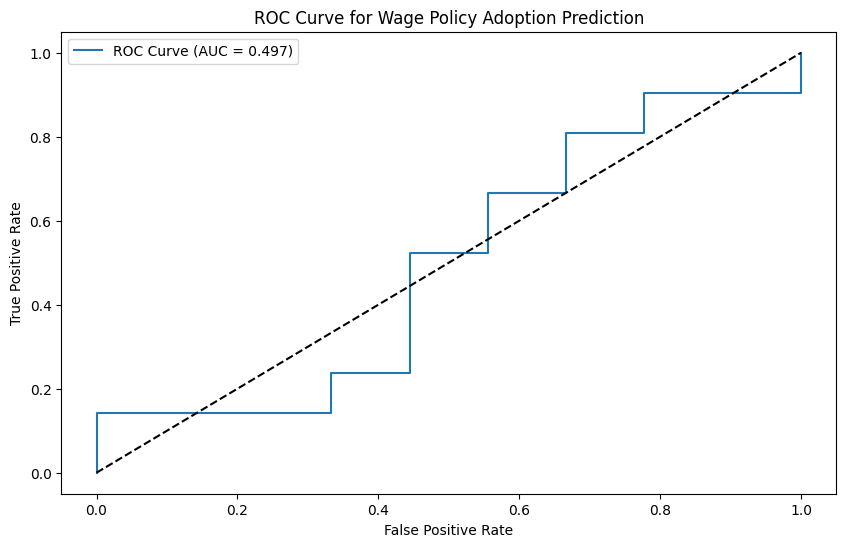


Feature Importance:
                    Feature  Coefficient  Odds Ratio   p-value
4             govt_ideology     0.171145    1.186663  0.451398
9     pct_neighbors_adopted     0.155954    1.168772  0.460482
5        months_to_election     0.134137    1.143550  0.541870
2      service_sector_share     0.072749    1.075461  0.740268
0            gdp_per_capita    -0.043011    0.957901  0.841339
10              region_Asia    -0.048538    0.952622  0.864907
7   administrative_capacity    -0.097963    0.906682  0.651784
1         unemployment_rate    -0.123759    0.883593  0.560435
6            govt_stability    -0.172577    0.841494  0.447293
11            region_Europe    -0.179191    0.835946  0.524071
13           region_Oceania    -0.202727    0.816501  0.485850
12     region_North America    -0.247429    0.780806  0.429116
8              fiscal_space    -0.266334    0.766183  0.252368
3   pre_existing_safety_net    -0.288227    0.749592  0.184971
14     region_South America    -0.

<ipython-input-14-3520b399b647>:216: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefs, palette='viridis')


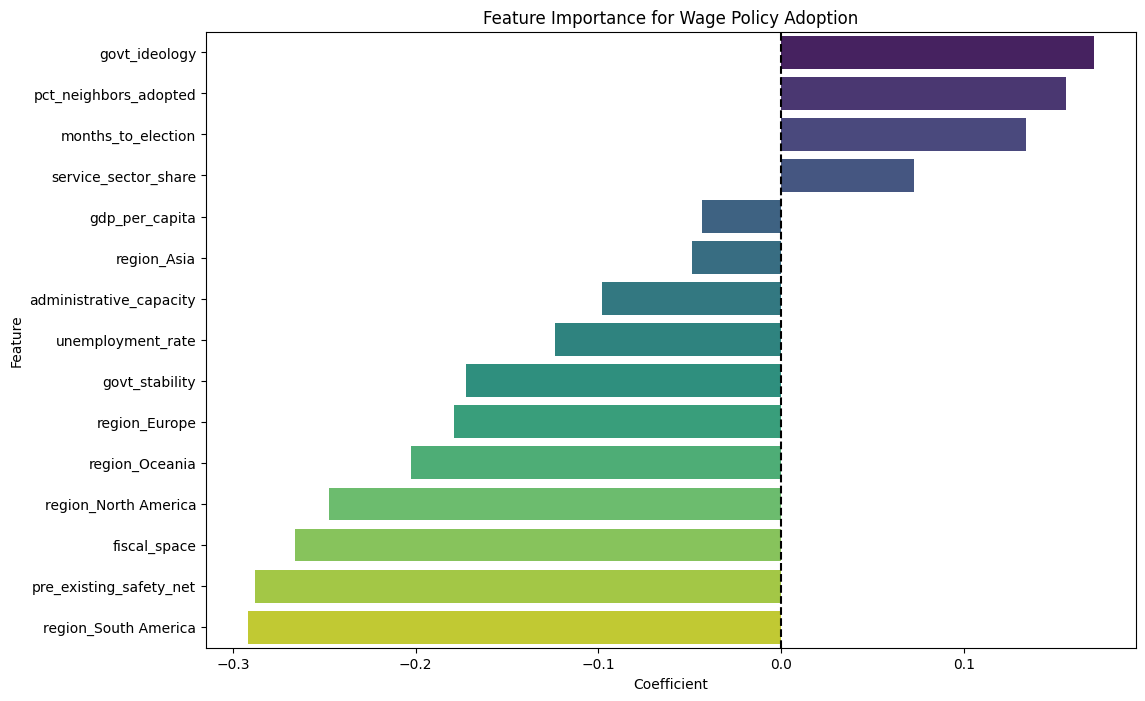

Step 5: Running survival analysis model...


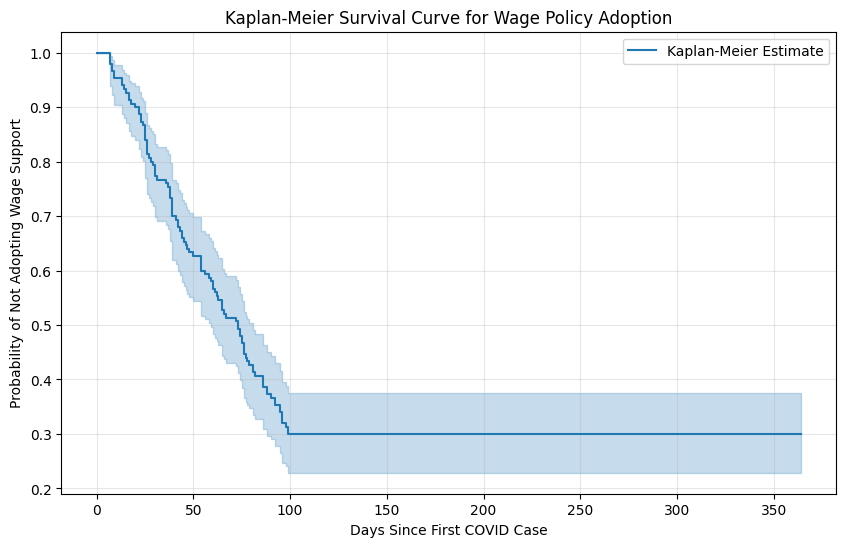


Cox Proportional Hazards Model Results:


<lifelines.CoxPHFitter: fitted with 150 total observations, 105 right-censored observations>
             duration col = 'time_to_event'
                event col = 'censored'
      baseline estimation = breslow
   number of observations = 150
number of events observed = 45
   partial log-likelihood = -112.89
         time fit was run = 2025-03-30 18:15:11 UTC

---
                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                
gdp_per_capita           0.13      1.14      0.21           -0.28            0.54                0.75                1.72
unemployment_rate        0.20      1.22      0.23           -0.25            0.65                0.78                1.92
service_sector_share    -0.28      0.76      0.27           -0.81            0.25                0.45                1.29
pre_existing_safety_net -0.78      0.46      0.24           -1.25           -0.31                0.29                0.73
govt_ideology            0.27      1.31      0.20           -0.13            0.67                0.88                1.95
months_to_election       0.11      1.12      0.22           -0.32            0.54                0.73                1.72
govt_stability          -0.26      0.77      0.20           -0.66            0.13                0.52                1.14
administrative_capacity -0.54      0.58      0.23           -0.98           -0.10                0.37                0.90
fiscal_space             0.53      1.71      0.27            0.01            1.06                1.01                2.88
pct_neighbors_adopted   -0.41      0.66      0.23           -0.86            0.03                0.43                1.03
region_Asia             -0.34      0.71      0.28           -0.89            0.21                0.41                1.23
region_Europe           -0.48      0.62      0.27           -1.00            0.05                0.37                1.05
region_North America    -0.41      0.66      0.33           -1.06            0.24                0.35                1.27
region_Oceania          -0.18      0.84      0.25           -0.68            0.32                0.51                1.38
region_South America    -0.25      0.78      0.26           -0.75            0.25                0.47                1.28

                         cmp to     z      p  -log2(p)
covariate                                             
gdp_per_capita             0.00  0.62   0.53      0.90
unemployment_rate          0.00  0.87   0.39      1.37
service_sector_share       0.00 -1.03   0.30      1.73
pre_existing_safety_net    0.00 -3.27 <0.005      9.84
govt_ideology              0.00  1.31   0.19      2.41
months_to_election         0.00  0.51   0.61      0.72
govt_stability             0.00 -1.29   0.20      2.35
administrative_capacity    0.00 -2.41   0.02      5.95
fiscal_space               0.00  2.01   0.04      4.49
pct_neighbors_adopted      0.00 -1.82   0.07      3.86
region_Asia                0.00 -1.22   0.22      2.17
region_Europe              0.00 -1.78   0.07      3.74
region_North America       0.00 -1.24   0.21      2.23
region_Oceania             0.00 -0.70   0.49      1.04
region_South America       0.00 -0.98   0.33      1.61
---
Concordance = 0.71
Partial AIC = 255.78
log-likelihood ratio test = 32.47 on 15 df
-log2(p) of ll-ratio test = 7.49

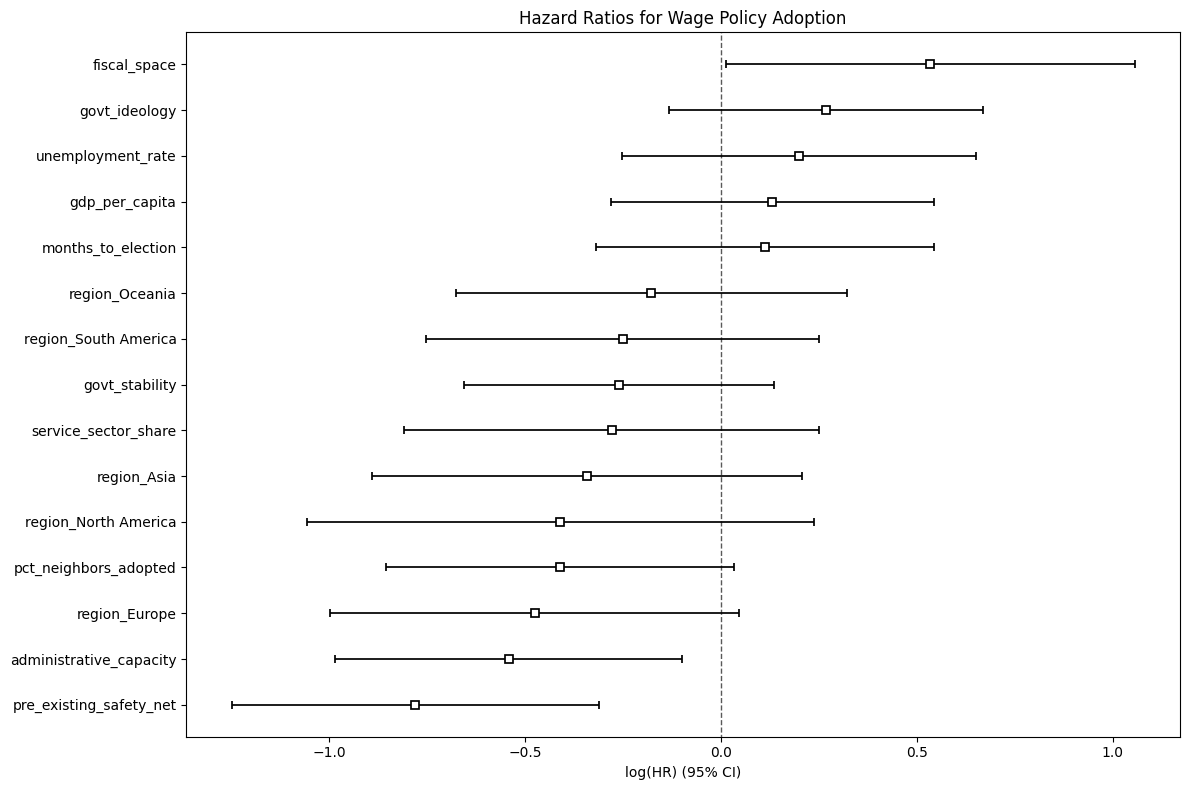

Step 6: Analyzing regional diffusion patterns...


<ipython-input-14-3520b399b647>:301: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='adoption_rate', data=region_adoption, palette='viridis')


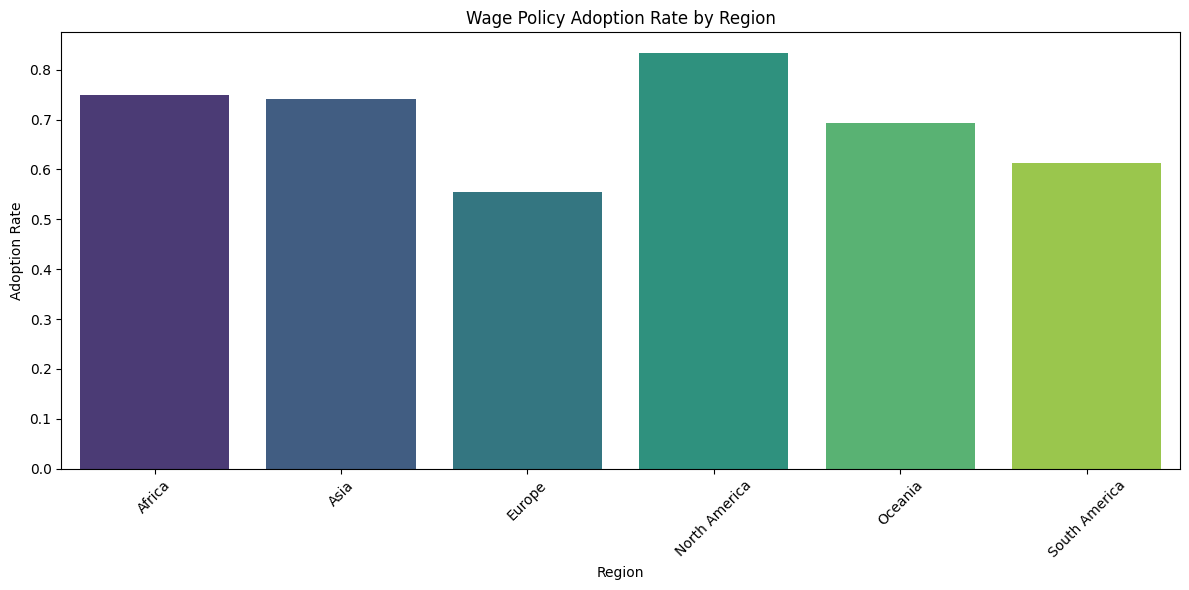

<ipython-input-14-3520b399b647>:311: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='avg_days_to_adoption', data=region_adoption, palette='viridis')


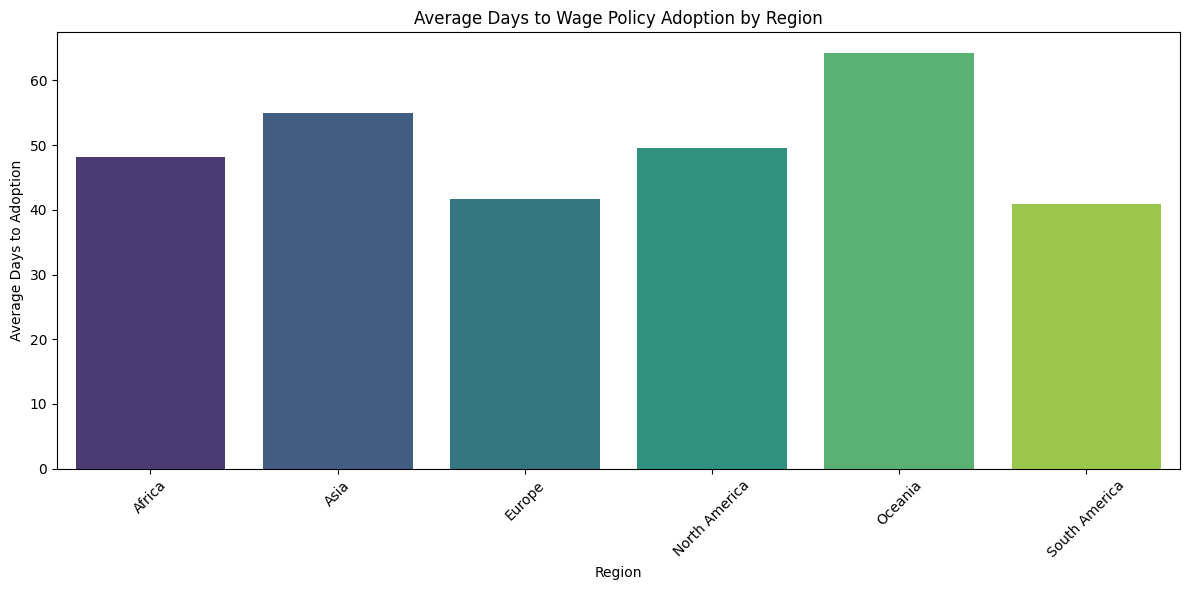

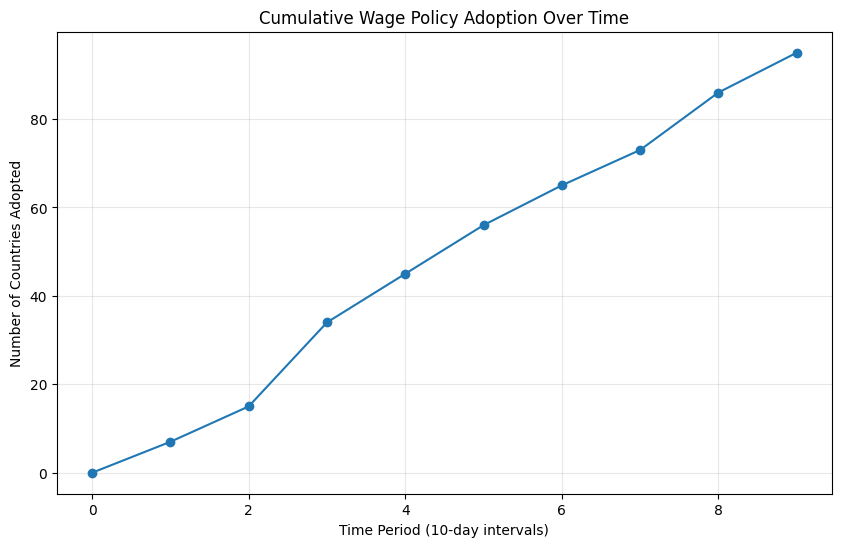

Analysis complete!


In [14]:


# Step 1: Load and prepare the data
def load_and_prepare_data(file_path):
    """
    Load the COVID-19 government response dataset and prepare it for analysis.
    """
    # Load the dataset
    df = pd.read_excel(file_path,sheet_name="Dataset")

    # Convert date to datetime
    df['d'] = pd.to_datetime(df['d'])

    policy_cols = ['school', 'school_local', 'masks', 'masks_partial', 'domestic', 'domestic_local',
                       'travel', 'travel_partial', 'travel_dom', 'travel_dom_partial', 'curf', 'curf_partial',
                       'mass', 'mass_partial', 'elect', 'elect_partial', 'sport', 'sport_partial', 'rest',
                       'rest_local', 'testing', 'testing_narrow', 'surveillance', 'surveillance_partial',
                       'state', 'state_partial']

    df[policy_cols] = df.groupby(['geoid', 'country'], group_keys=False)[policy_cols].apply(lambda group: group.ffill().bfill())
    df[policy_cols] = df[policy_cols].fillna(0) # Fill remaining missing policy values with 0

        # Linear interpolation for economic measures within each country
    economic_cols = ['wage', 'taxc', 'credit', 'cash', 'export', 'rate', 'Economic_Measures']
    df[economic_cols] = df.groupby(['geoid', 'country'], group_keys=False)[economic_cols].apply(lambda group: group.interpolate(method='linear'))
    df[economic_cols] = df[economic_cols].fillna(0) # Fill remaining missing economic values with 0

        # Rolling average for cases and deaths (7-day window)
    df[['cases', 'deaths']] = df.groupby(['geoid', 'country'], group_keys=False)[['cases', 'deaths']].apply(
            lambda group: group.fillna(group.rolling(7, min_periods=1).mean())
        )
    df[['cases', 'deaths']] = df[['cases', 'deaths']].fillna(0) # Fill remaining missing cases & deaths with 0

        # Drop election-related variables (optional)
    df.drop(columns=['elect', 'elect_partial'], errors='ignore', inplace=True)

        # Mean imputation for population within the same continent
    df['population_2019'] = df.groupby('continent')['population_2019'].transform(lambda x: x.fillna(x.mean()))

        # Fill missing continent values using most frequent value (mode)
    df['continent'].fillna(df['continent'].mode()[0], inplace=True)

    # Create country-level dataframe with first COVID case date
    country_df = df.groupby('country').agg(
        first_case_date=('d', lambda x: x[df['cases'] > 0].min()),
        first_death_date=('d', lambda x: x[df['deaths'] > 0].min())
    ).reset_index()

    # For each country, find the date when wage support was first implemented
    wage_implementation = df[df['wage'] == 1].groupby('country')['d'].min().reset_index()
    wage_implementation.rename(columns={'d': 'wage_implementation_date'}, inplace=True)

    # Merge with country_df
    country_df = country_df.merge(wage_implementation, on='country', how='left')

    # Create binary indicator for wage policy adoption
    country_df['adopted_wage_policy'] = country_df['wage_implementation_date'].notna().astype(int)

    # Calculate time to adoption (days from first case to wage policy)
    country_df['days_to_adoption'] = (country_df['wage_implementation_date'] -
                                     country_df['first_case_date']).dt.days

    # For countries that didn't adopt, set time to adoption as censored (using max study period)
    max_date = df['d'].max()
    country_df['days_censored'] = (max_date - country_df['first_case_date']).dt.days
    country_df['time_to_event'] = country_df['days_to_adoption'].fillna(country_df['days_censored'])
    country_df['censored'] = country_df['adopted_wage_policy'].apply(lambda x: 0 if x == 1 else 1)

    return df, country_df

# Step 2: Merge with external data sources
def enrich_data(country_df):
    """
    Enrich the dataset with economic, political, and geographic data.
    In a real implementation, you would load these from external data sources.
    """
    # Example: Create dummy variables for demonstration
    # In practice, you'd load real data from World Bank, IMF, etc.
    np.random.seed(42)
    n_countries = len(country_df)

    # Economic factors
    country_df['gdp_per_capita'] = np.random.normal(20000, 15000, n_countries)
    country_df['unemployment_rate'] = np.random.uniform(3, 20, n_countries)
    country_df['service_sector_share'] = np.random.uniform(40, 80, n_countries)
    country_df['pre_existing_safety_net'] = np.random.uniform(0, 1, n_countries)

    # Political factors
    country_df['govt_ideology'] = np.random.choice([-1, 0, 1], n_countries)  # -1: right, 0: center, 1: left
    country_df['months_to_election'] = np.random.randint(0, 48, n_countries)
    country_df['govt_stability'] = np.random.uniform(0, 1, n_countries)

    # Institutional factors
    country_df['administrative_capacity'] = np.random.uniform(0, 1, n_countries)
    country_df['fiscal_space'] = np.random.uniform(0, 1, n_countries)

    # Region encoding
    regions = ['Europe', 'Asia', 'North America', 'South America', 'Africa', 'Oceania']
    country_df['region'] = np.random.choice(regions, n_countries)

    return country_df

# Step 3: Create spatial weights for diffusion analysis
def create_spatial_weights(country_df):
    """
    Create spatial weights matrix for geographic diffusion analysis.
    In a real implementation, you would use actual geographic data.
    """
    # Create dummy coordinates for demonstration
    # In practice, you'd use actual country centroids or shared borders
    np.random.seed(42)
    n_countries = len(country_df)

    # Generate random coordinates for countries
    coords = np.random.rand(n_countries, 2)

    # Calculate distance matrix
    dist_matrix = squareform(pdist(coords, 'euclidean'))

    # Create binary contiguity matrix (1 if countries are "neighbors")
    # Using a threshold to determine neighbors
    threshold = np.percentile(dist_matrix, 10)  # Bottom 10% of distances are considered neighbors
    weights_matrix = (dist_matrix <= threshold).astype(int)

    # Set diagonal to 0 (country isn't its own neighbor)
    np.fill_diagonal(weights_matrix, 0)

    # Calculate percentage of neighboring countries with wage policies
    neighbor_adoption = []
    for i in range(n_countries):
        neighbors = np.where(weights_matrix[i] == 1)[0]
        if len(neighbors) > 0:
            adopted_neighbors = sum(country_df.iloc[neighbors]['adopted_wage_policy'])
            pct_adopted = adopted_neighbors / len(neighbors)
        else:
            pct_adopted = 0
        neighbor_adoption.append(pct_adopted)

    country_df['pct_neighbors_adopted'] = neighbor_adoption

    return country_df, weights_matrix

# Step 4: Logistic Regression Model
def run_logistic_regression(country_df):
    """
    Run logistic regression to predict wage policy adoption.
    """
    # Select features and target
    features = [
        'gdp_per_capita', 'unemployment_rate', 'service_sector_share', 'pre_existing_safety_net',
        'govt_ideology', 'months_to_election', 'govt_stability',
        'administrative_capacity', 'fiscal_space', 'pct_neighbors_adopted'
    ]

    # Add region dummy variables
    region_dummies = pd.get_dummies(country_df['region'], prefix='region', drop_first=True)
    X = pd.concat([country_df[features], region_dummies], axis=1)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Define target
    y = country_df['adopted_wage_policy']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Add constant for statsmodels
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)

    # Fit logistic regression
    logit_model = sm.Logit(y_train, X_train_sm)
    result = logit_model.fit(disp=0)

    # Make predictions
    y_pred_prob = result.predict(X_test_sm)
    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Evaluate model
    print("\nLogistic Regression Model Results:")
    print(result.summary())

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Wage Policy Adoption Prediction')
    plt.legend()
    plt.show()

    # Feature importance analysis
    coefs = pd.DataFrame({
        'Feature': result.params.index[1:],  # Skip the constant term
        'Coefficient': result.params.values[1:],
        'Odds Ratio': np.exp(result.params.values[1:]),
        'p-value': result.pvalues.values[1:]
    }).sort_values('Coefficient', ascending=False)

    print("\nFeature Importance:")
    print(coefs)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coefs, palette='viridis')
    plt.title('Feature Importance for Wage Policy Adoption')
    plt.axvline(x=0, color='black', linestyle='--')
    plt.show()

    return result, coefs

# Step 5: Survival Analysis Model
def run_survival_analysis(country_df):
    """
    Run survival analysis to model time-to-adoption for wage policies.
    """
    # Select features for Cox model
    features = [
        'gdp_per_capita', 'unemployment_rate', 'service_sector_share', 'pre_existing_safety_net',
        'govt_ideology', 'months_to_election', 'govt_stability',
        'administrative_capacity', 'fiscal_space', 'pct_neighbors_adopted'
    ]

    # Add region dummy variables
    region_dummies = pd.get_dummies(country_df['region'], prefix='region', drop_first=True)
    df_surv = pd.concat([
        country_df[features],
        region_dummies,
        country_df[['time_to_event', 'censored']]
    ], axis=1)

    # Scale features
    surv_features = list(df_surv.columns[:-2])  # All columns except time_to_event and censored
    scaler = StandardScaler()
    df_surv[surv_features] = scaler.fit_transform(df_surv[surv_features])

    # Basic survival curve using Kaplan-Meier
    kmf = KaplanMeierFitter()
    kmf.fit(
        df_surv['time_to_event'],
        event_observed=(1-df_surv['censored']),
        label='Kaplan-Meier Estimate'
    )

    # Plot Kaplan-Meier curve
    plt.figure(figsize=(10, 6))
    kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curve for Wage Policy Adoption')
    plt.xlabel('Days Since First COVID Case')
    plt.ylabel('Probability of Not Adopting Wage Support')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Fit Cox Proportional Hazards model
    cph = CoxPHFitter()
    cph.fit(
        df_surv,
        duration_col='time_to_event',
        event_col='censored',
        # The event_observed_col argument is deprecated.
        # The event_col argument now implicitly handles event observation.
        #show_progress=True
    )

    print("\nCox Proportional Hazards Model Results:")
    cph.print_summary()

    # Plot coefficient hazard ratios
    plt.figure(figsize=(12, 8))
    cph.plot()
    plt.title('Hazard Ratios for Wage Policy Adoption')
    plt.tight_layout()
    plt.show()

    return cph

# Step 6: Regional Diffusion Analysis
def analyze_regional_diffusion(df, country_df, weights_matrix):
    """
    Analyze the regional diffusion patterns of wage policy adoption.
    """
    # Group countries by region
    region_adoption = country_df.groupby('region').agg(
        adoption_rate=('adopted_wage_policy', 'mean'),
        avg_days_to_adoption=('days_to_adoption', 'mean')
    ).reset_index()

    # Plot adoption rate by region
    plt.figure(figsize=(12, 6))
    sns.barplot(x='region', y='adoption_rate', data=region_adoption, palette='viridis')
    plt.title('Wage Policy Adoption Rate by Region')
    plt.xlabel('Region')
    plt.ylabel('Adoption Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot average time to adoption by region
    plt.figure(figsize=(12, 6))
    sns.barplot(x='region', y='avg_days_to_adoption', data=region_adoption, palette='viridis')
    plt.title('Average Days to Wage Policy Adoption by Region')
    plt.xlabel('Region')
    plt.ylabel('Average Days to Adoption')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Create lagged variable for spatial diffusion testing
    # This would test if countries are more likely to adopt after their neighbors
    # For demonstration purposes only - in a real analysis you'd use panel data and proper spatial econometrics

    # Create a dummy temporal sequence of adoption for visualization
    country_df_sorted = country_df.sort_values('days_to_adoption').reset_index(drop=True)
    adopters = country_df_sorted[country_df_sorted['adopted_wage_policy'] == 1]

    # Visualize the adoption sequence
    adoption_sequence = []
    for t in range(10):  # Simulate 10 time periods
        # Countries that adopted by this time period
        early_adopters = adopters[adopters['days_to_adoption'] <= t*10]['country'].tolist()
        adoption_sequence.append(len(early_adopters))

    plt.figure(figsize=(10, 6))
    plt.plot(range(10), adoption_sequence, marker='o', linestyle='-')
    plt.title('Cumulative Wage Policy Adoption Over Time')
    plt.xlabel('Time Period (10-day intervals)')
    plt.ylabel('Number of Countries Adopted')
    plt.grid(True, alpha=0.3)
    plt.show()

    return region_adoption

# Step 7: Main function to run the entire analysis
def main():
    """
    Run the entire analysis pipeline.
    """
    print("Step 1: Loading and preparing data...")
    # In a real implementation, you would provide the actual file path
    df, country_df = load_and_prepare_data('/content/Gov_Responses2Covid19_last.xlsx')

    # For demonstration, create a synthetic dataframe
    n_countries = 150
    country_names = [f"Country_{i}" for i in range(n_countries)]

    np.random.seed(42)
    country_df = pd.DataFrame({
        'country': country_names,
        'first_case_date': pd.date_range(start='2020-01-01', periods=n_countries),
        'adopted_wage_policy': np.random.binomial(1, 0.7, n_countries)
    })

    # Generate random dates for wage implementation
    adoption_dates = []
    for i in range(n_countries):
        if country_df.iloc[i]['adopted_wage_policy'] == 1:
            # Random number of days after first case
            days_delay = np.random.randint(7, 100)
            adoption_date = country_df.iloc[i]['first_case_date'] + timedelta(days=days_delay)
            adoption_dates.append(adoption_date)
        else:
            adoption_dates.append(None)

    country_df['wage_implementation_date'] = adoption_dates
    country_df['days_to_adoption'] = [(d - country_df.iloc[i]['first_case_date']).days
                                      if d is not None else None
                                      for i, d in enumerate(adoption_dates)]

    max_date = pd.Timestamp('2020-12-31')
    country_df['days_censored'] = [(max_date - country_df.iloc[i]['first_case_date']).days
                                   for i in range(n_countries)]
    country_df['time_to_event'] = country_df['days_to_adoption'].fillna(country_df['days_censored'])
    country_df['censored'] = country_df['adopted_wage_policy'].apply(lambda x: 0 if x == 1 else 1)

    df = pd.DataFrame()  # Placeholder for the full dataset

    print("Step 2: Enriching data with external factors...")
    country_df = enrich_data(country_df)

    print("Step 3: Creating spatial weights for diffusion analysis...")
    country_df, weights_matrix = create_spatial_weights(country_df)

    print("Step 4: Running logistic regression model...")
    logit_results, feature_importance = run_logistic_regression(country_df)

    print("Step 5: Running survival analysis model...")
    cox_results = run_survival_analysis(country_df)

    print("Step 6: Analyzing regional diffusion patterns...")
    diffusion_results = analyze_regional_diffusion(df, country_df, weights_matrix)

    print("Analysis complete!")

if __name__ == "__main__":
    main()